<a href="https://colab.research.google.com/github/JanechrisDataAnalyst/Practical-projects/blob/main/ANN_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv")
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1452,1453,15774882,Mazzanti,687,France,Female,35,3,99587.43,1,1,1,1713.10,1
4919,4920,15625941,Gray,682,Spain,Female,50,10,128039.01,1,1,1,102260.16,0
4988,4989,15775067,Fang,606,France,Male,47,3,93578.68,2,0,1,137720.56,1
7779,7780,15699225,Pirozzi,757,France,Male,46,0,0.00,2,1,0,37460.05,0
9665,9666,15745794,Cocci,547,France,Male,30,6,0.00,2,1,1,18471.86,0


2. Prepare the Dataset:

In [ ]:
X = data.iloc[:,3: -1].values

In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
Y = data.iloc[:,-1].values

In [ ]:
Y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# Encoding categorical variables Gender
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()

In [ ]:
X[:,2]

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [ ]:
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

In [ ]:
X[:,2]

array([0, 0, 0, ..., 0, 1, 0], dtype=object)

In [ ]:
# Encoding categorical variables for Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [("encoder",OneHotEncoder(),[1])],remainder = "passthrough")
X = np.array(ct.fit_transform(X))

In [ ]:
X[:,1]

array([0.0, 0.0, 0.0, ..., 0.0, 1.0, 0.0], dtype=object)

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

## Splitting the data to train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,random_state=0)

In [ ]:
# Feature Scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [ ]:
X_test

array([[-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121,  1.62185911],
       [ 1.04501206, -0.61433742, -0.57427105, ...,  0.66011376,
        -1.02429504,  0.504204  ],
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
         0.97628121, -0.41865644],
       ...,
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
        -1.02429504,  0.72775202],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121, -1.54162886],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
        -1.02429504,  1.62356528]])

# Initializing Artificial Neural Network

1. input + 2 hidden(6 neurones,"rely") + output(1 neuron, "sigmoid")

In [ ]:
ann = tf.keras.models.Sequential()
ann

In [ ]:
# adding the first hidden layer
ann.add(tf.keras.layers.Dense(units =6, activation = "relu"))

#adding the second hidden layer
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))

# adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))

In [ ]:
ann

In [ ]:

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann.fit(X_train,Y_train,batch_size = 32,epochs = 30)

Epoch 1/30
250/250 [==============================] - 2s 4ms/step - loss: 0.7900 - accuracy: 0.5428
Epoch 2/30
250/250 [==============================] - 1s 3ms/step - loss: 0.6169 - accuracy: 0.7814
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7984
Epoch 4/30
250/250 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.8018
Epoch 5/30
250/250 [==============================] - 1s 2ms/step - loss: 0.4472 - accuracy: 0.8060
Epoch 6/30
250/250 [==============================] - 1s 2ms/step - loss: 0.4275 - accuracy: 0.8102
Epoch 7/30
250/250 [==============================] - 1s 2ms/step - loss: 0.4117 - accuracy: 0.8152
Epoch 8/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3996 - accuracy: 0.8177
Epoch 9/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3900 - accuracy: 0.8202
Epoch 10/30
250/250 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.8248

In [ ]:
#Increasing the epoch by 80
ann.fit(X_train,Y_train,batch_size = 32,epochs = 80)

Epoch 1/80
250/250 [==============================] - 1s 3ms/step - loss: 0.3289 - accuracy: 0.8640
Epoch 2/80
250/250 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.8649
Epoch 3/80
250/250 [==============================] - 1s 2ms/step - loss: 0.3285 - accuracy: 0.8655
Epoch 4/80
250/250 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8644
Epoch 5/80
250/250 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8654
Epoch 6/80
250/250 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.8660
Epoch 7/80
250/250 [==============================] - 1s 3ms/step - loss: 0.3281 - accuracy: 0.8640
Epoch 8/80
250/250 [==============================] - 1s 3ms/step - loss: 0.3285 - accuracy: 0.8658
Epoch 9/80
250/250 [==============================] - 1s 4ms/step - loss: 0.3287 - accuracy: 0.8659
Epoch 10/80
250/250 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8651

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [ ]:
#predicting results for a new observation
print(ann.predict(sc.transform([[600,0,1,40,3,1,1,0,0,60000,0,1]])))

1/1 [==============================] - 0s 23ms/step
[[1.]]


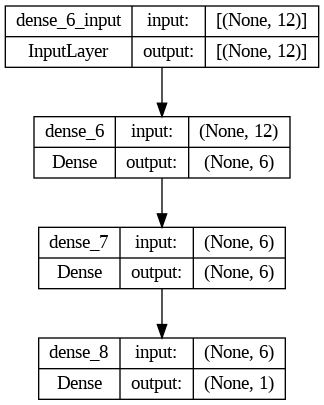

In [ ]:
# plot model architecture
from tensorflow.keras.utils import plot_model
plot_model(ann, to_file = "model_plot.png", show_shapes = True, show_layer_names = True)